### Importación de datos



In [378]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


In [379]:

# Suma de la columna 'precio'
suma_tienda_1 = tienda["Precio"].sum()
suma_tienda_4 = tienda4["Precio"].sum()

# Mostrar resultados
print(f"Suma Tienda 1: {suma_tienda_1}")
print(f"Suma Tienda 4: {suma_tienda_4}")
print("¿Son iguales?", suma_tienda_1 == suma_tienda_4)

Suma Tienda 1: 1150880400.0
Suma Tienda 4: 1038375700.0
¿Son iguales? False


#1. Análisis de facturación



In [380]:
tiendas = [tienda, tienda2, tienda3, tienda4]
def calcular_facturacion(tiendas):
    facturacion_data = []

    for i, tienda in enumerate(tiendas, start=1):
        tienda_facturacion = float(sum(tienda['Precio']))
        nombre = 'Tienda' if i == 1 else f'Tienda {i}'
        facturacion_data.append({'Tienda': nombre, 'Facturación': tienda_facturacion})
        print(f'La facturación de {nombre} es de {tienda_facturacion:,.0f}')

    return facturacion_data

calcular_facturacion(tiendas)

La facturación de Tienda es de 1,150,880,400
La facturación de Tienda 2 es de 1,116,343,500
La facturación de Tienda 3 es de 1,098,019,600
La facturación de Tienda 4 es de 1,038,375,700


[{'Tienda': 'Tienda', 'Facturación': 1150880400.0},
 {'Tienda': 'Tienda 2', 'Facturación': 1116343500.0},
 {'Tienda': 'Tienda 3', 'Facturación': 1098019600.0},
 {'Tienda': 'Tienda 4', 'Facturación': 1038375700.0}]

La facturación de Tienda es de 1,150,880,400
La facturación de Tienda 2 es de 1,116,343,500
La facturación de Tienda 3 es de 1,098,019,600
La facturación de Tienda 4 es de 1,038,375,700


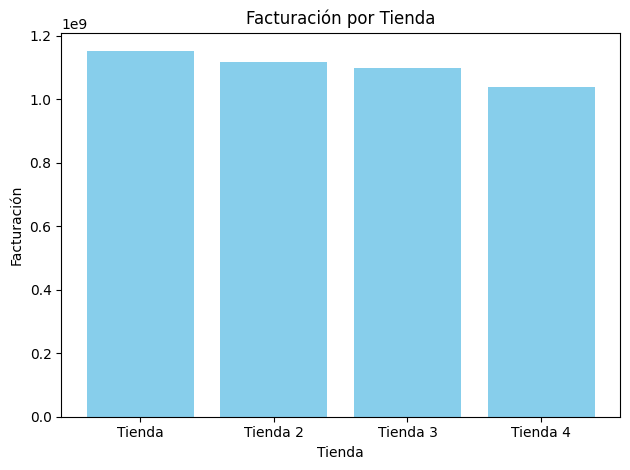

In [381]:
facturacion_data = calcular_facturacion(tiendas)

tiendas_nombres = [tienda['Tienda'] for tienda in facturacion_data]
facturaciones = [tienda['Facturación'] for tienda in facturacion_data]

plt.bar(tiendas_nombres, facturaciones, color='skyblue')

plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.tight_layout()
plt.show()

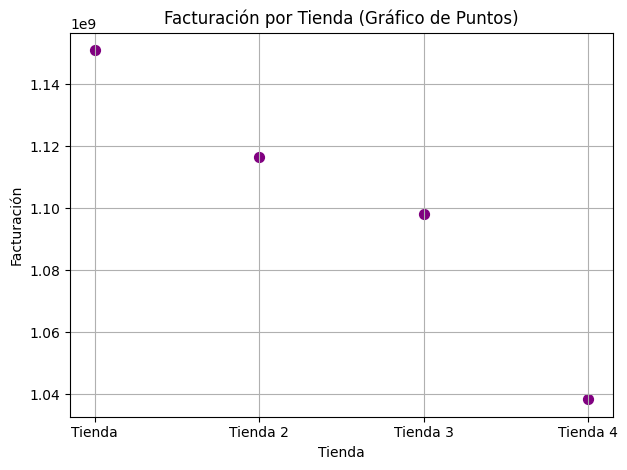

In [382]:
#Grafico de puntos
tiendas_nombres = [d['Tienda'] for d in facturacion_data]
facturaciones = [d['Facturación'] for d in facturacion_data]

plt.scatter(tiendas_nombres, facturaciones, color='purple', s=50)
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.title('Facturación por Tienda (Gráfico de Puntos)')
plt.grid(True)
plt.tight_layout()
plt.show()

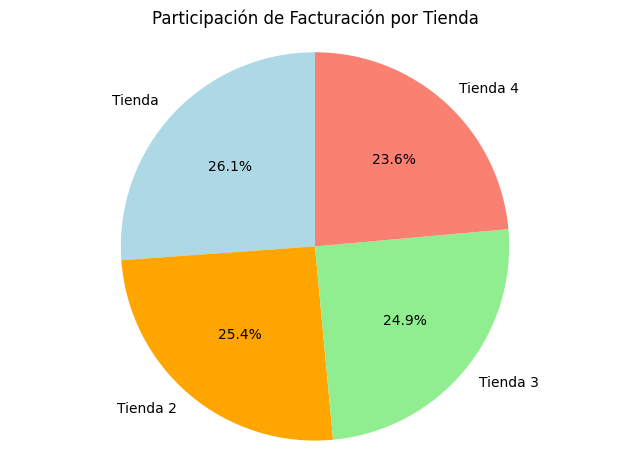

In [383]:
#Grafico de torta
tiendas_nombres = [d['Tienda'] for d in facturacion_data]
facturaciones = [d['Facturación'] for d in facturacion_data]

plt.pie(facturaciones, labels=tiendas_nombres, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'lightgreen', 'salmon'])
plt.title('Participación de Facturación por Tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [384]:
def analizar_ventas_por_categoria(tiendas):
    ventas_por_categoria_data = []

    for i, tienda_actual in enumerate(tiendas, start=1):
        ventas_por_categoria = tienda_actual.groupby('Categoría del Producto')['Producto'].count()
        tienda_nombre = f"Tienda {i}" if i > 1 else "Tienda"
        ventas_por_categoria_data.append({
            'Tienda': tienda_nombre,
            'Ventas por Categoría': ventas_por_categoria
        })

        print(f'\nVentas por categoría en {tienda_nombre}:')
        print(ventas_por_categoria)

        print(f'\nCategorías más populares de la {tienda_nombre}:')
        print(ventas_por_categoria.nlargest(3))
        print('--------------------------------------')

    return ventas_por_categoria_data

ventas_por_categoria_data = analizar_ventas_por_categoria(tiendas)


Ventas por categoría en Tienda:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Producto, dtype: int64

Categorías más populares de la Tienda:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: Producto, dtype: int64
--------------------------------------

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Producto, dtype: int64

Categorías más populares de la Tienda 2:
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: Producto, 

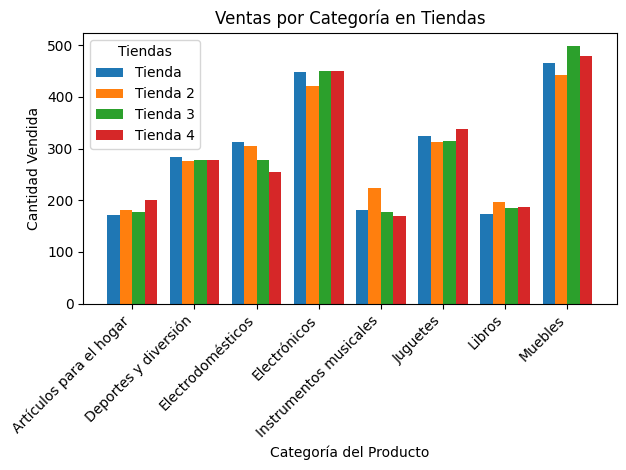

In [385]:
#Grafico de barrar de categorias por tienda
def graficar_barras_ventas_por_categoria(ventas_por_categoria_data):
    width = 0.2
    offset = -width * (len(ventas_por_categoria_data) - 1) / 2

    for idx, tienda_data in enumerate(ventas_por_categoria_data):
        x_positions = [x + offset + idx * width for x in range(len(tienda_data['Ventas por Categoría']))]
        plt.bar(x_positions, tienda_data['Ventas por Categoría'].values, label=tienda_data['Tienda'], width=width, align='center')

    plt.title('Ventas por Categoría en Tiendas')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad Vendida')

    all_categories = ventas_por_categoria_data[0]['Ventas por Categoría'].index
    plt.xticks(range(len(all_categories)), all_categories, rotation=45, ha="right")

    plt.legend(title='Tiendas')
    plt.tight_layout()
    plt.show()

graficar_barras_ventas_por_categoria(ventas_por_categoria_data)

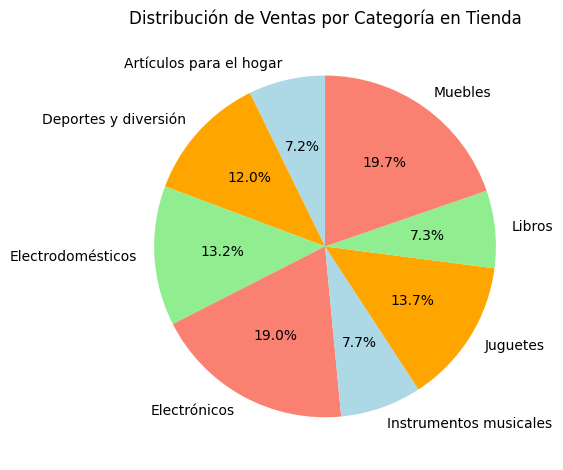

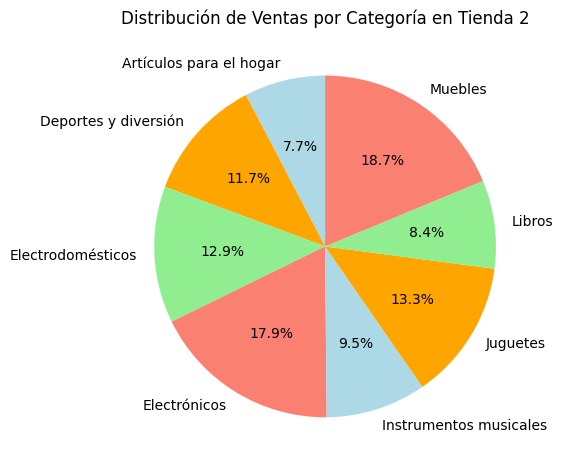

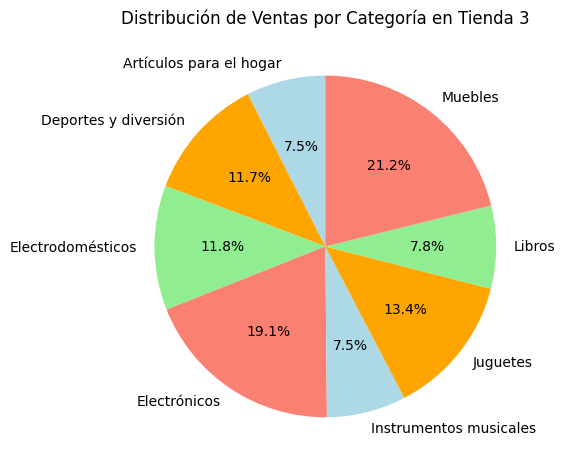

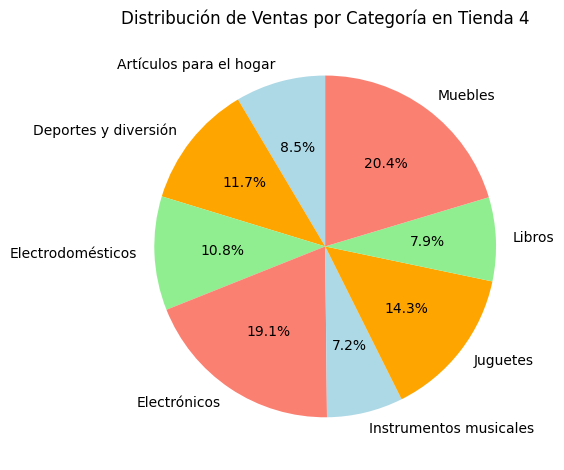

In [386]:
#Grafico de pie de categorias por tienda
def graficar_torta_ventas_por_categoria(ventas_por_categoria_data):
    for tienda_data in ventas_por_categoria_data:
        plt.pie(tienda_data['Ventas por Categoría'], labels=tienda_data['Ventas por Categoría'].index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'lightgreen', 'salmon'])
        plt.title(f'Distribución de Ventas por Categoría en {tienda_data["Tienda"]}')
        plt.tight_layout()
        plt.show()

graficar_torta_ventas_por_categoria(ventas_por_categoria_data)

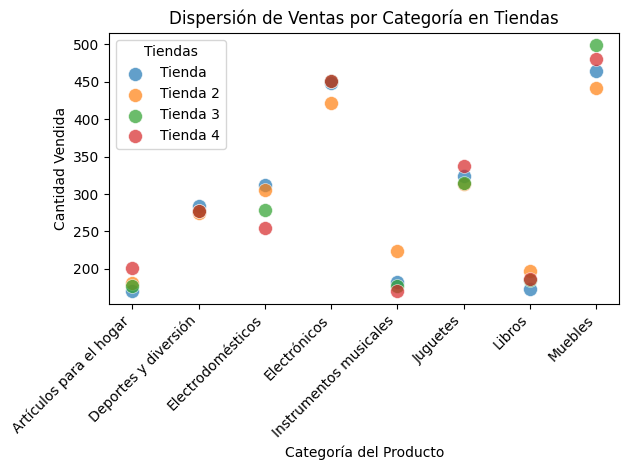

In [387]:
#Grafico de dispersion
def graficar_dispersión_ventas_por_categoria(ventas_por_categoria_data):
    for tienda_data in ventas_por_categoria_data:
        x = tienda_data['Ventas por Categoría'].index
        y = tienda_data['Ventas por Categoría'].values

        plt.scatter(x, y, label=tienda_data['Tienda'], s=100, alpha=0.7, edgecolors='w', linewidth=0.5)

    plt.title('Dispersión de Ventas por Categoría en Tiendas')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad Vendida')

    plt.xticks(rotation=45, ha='right')

    plt.legend(title='Tiendas')
    plt.tight_layout()
    plt.show()

graficar_dispersión_ventas_por_categoria(ventas_por_categoria_data)

# 3. Calificación promedio de la tienda


In [388]:
tiendas = [tienda, tienda2, tienda3, tienda4]
def calcular_calificacion_promedio(tiendas):
    calificacion_data = []

    for i, tienda in enumerate(tiendas, start=1):
        calificacion_promedio = tienda['Calificación'].mean()

        nombre = 'Tienda' if i == 1 else f'Tienda {i}'
        calificacion_data.append({'Tienda': nombre, 'Calificación Promedio': calificacion_promedio})

        # Imprimir resultados
        print(f'La calificación promedio de {nombre} es de {calificacion_promedio:,.6f}')
        print('--------------------------------------')

    return calificacion_data

# Llamada a la función
calificacion_data = calcular_calificacion_promedio(tiendas)

La calificación promedio de Tienda es de 3.976685
--------------------------------------
La calificación promedio de Tienda 2 es de 4.037304
--------------------------------------
La calificación promedio de Tienda 3 es de 4.048326
--------------------------------------
La calificación promedio de Tienda 4 es de 3.995759
--------------------------------------


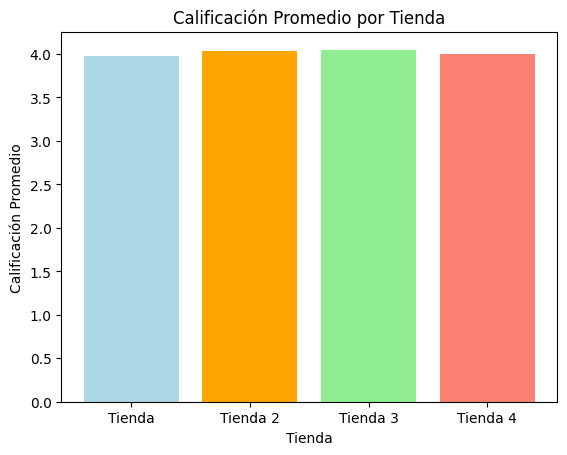

In [389]:
#Grafico de barras
def graficar_barras_calificaciones(tiendas):
    tiendas_nombres = [d['Tienda'] for d in calificacion_data]
    calificaciones = [d['Calificación Promedio'] for d in calificacion_data]

    plt.bar(tiendas_nombres, calificaciones, color=['lightblue', 'orange', 'lightgreen', 'salmon'])
    plt.title('Calificación Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio')
    plt.show()

graficar_barras_calificaciones(tiendas)


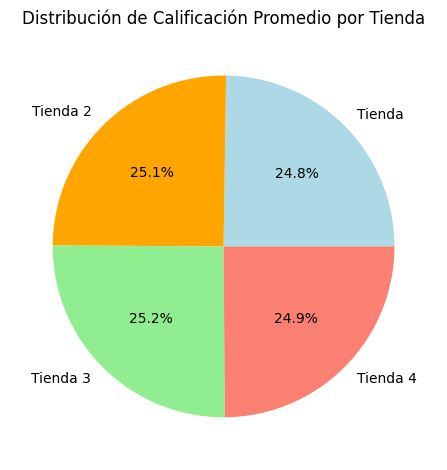

In [390]:
#Grafico de torta
def graficar_torta_calificaciones(tiendas):
    tiendas_nombres = [d['Tienda'] for d in calificacion_data]
    calificaciones = [d['Calificación Promedio'] for d in calificacion_data]

    plt.pie(calificaciones, labels=tiendas_nombres, autopct='%1.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'salmon'])
    plt.title('Distribución de Calificación Promedio por Tienda')
    plt.tight_layout()
    plt.show()

graficar_torta_calificaciones(tiendas)


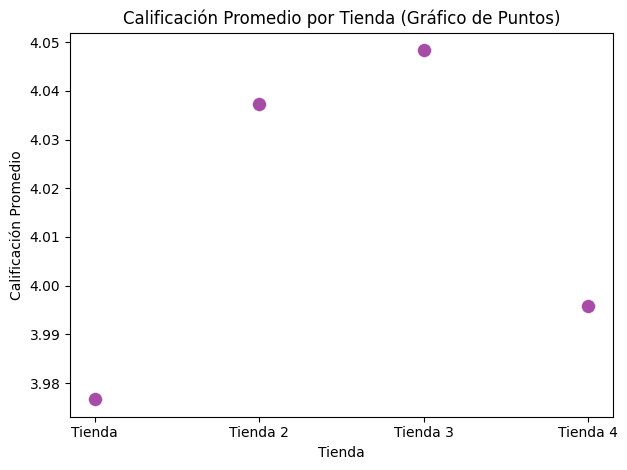

In [391]:
#Grafico de dispersion
def graficar_dispersion_calificaciones(tiendas):
    tiendas_nombres = [d['Tienda'] for d in calificacion_data]
    calificaciones = [d['Calificación Promedio'] for d in calificacion_data]

    plt.scatter(tiendas_nombres, calificaciones, color='purple', s=100, alpha=0.7, edgecolors='w', linewidth=0.5)
    plt.title('Calificación Promedio por Tienda (Gráfico de Puntos)')
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio')
    plt.tight_layout()
    plt.show()

graficar_dispersion_calificaciones(tiendas)


# 4. Productos más y menos vendidos

In [392]:
tiendas = [tienda, tienda2, tienda3, tienda4]
def obtener_productos_vendidos(tiendas):
    productos_data = []

    for i, tienda in enumerate(tiendas, start=1):
        productos_mas_vendidos = tienda.groupby('Producto')['Producto'].count().nlargest(3)
        productos_menos_vendidos = tienda.groupby('Producto')['Producto'].count().nsmallest(3)

        nombre = 'Tienda' if i == 1 else f'Tienda {i}'

        productos_data.append({
            'Tienda': nombre,
            'Productos Más Vendidos': productos_mas_vendidos,
            'Productos Menos Vendidos': productos_menos_vendidos
        })

        # Imprimir resultados
        print(f'\nProductos más vendidos de {nombre}:')
        print(productos_mas_vendidos)
        print(f'\nProductos menos vendidos de {nombre}:')
        print(productos_menos_vendidos)
        print('--------------------------------------')

    return productos_data

# Llamada a la función
productos_data = obtener_productos_vendidos(tiendas)


Productos más vendidos de Tienda:
Producto
Armario          60
Microondas       60
TV LED UHD 4K    60
Name: Producto, dtype: int64

Productos menos vendidos de Tienda:
Producto
Auriculares con micrófono    33
Celular ABXY                 33
Olla de presión              35
Name: Producto, dtype: int64
--------------------------------------

Productos más vendidos de Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: Producto, dtype: int64

Productos menos vendidos de Tienda 2:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Name: Producto, dtype: int64
--------------------------------------

Productos más vendidos de Tienda 3:
Producto
Kit de bancas      57
Cama king          56
Mesa de comedor    56
Name: Producto, dtype: int64

Productos menos vendidos de Tienda 3:
Producto
Bloques de construcción    35
Microondas                 36
Mochila                    36
Name: Producto, dtype: in

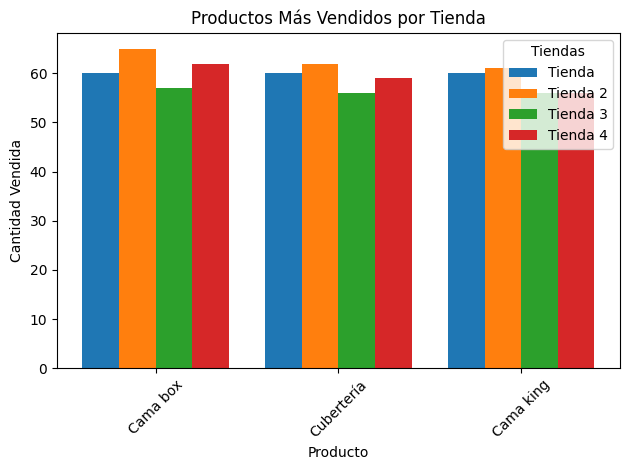

In [393]:
def graficar_barras_mas_vendidos(tiendas_data):
    width = 0.2
    x = np.arange(len(tiendas_data[0]['Productos Más Vendidos'].index))

    for i, tienda_data in enumerate(tiendas_data):
        productos_mas_vendidos = tienda_data['Productos Más Vendidos']
        plt.bar(x + i * width, productos_mas_vendidos.values, width=width, label=tienda_data['Tienda'])

    plt.title('Productos Más Vendidos por Tienda')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(x + width * (len(tiendas_data) - 1) / 2, productos_mas_vendidos.index, rotation=45)
    plt.legend(title='Tiendas')
    plt.tight_layout()
    plt.show()

graficar_barras_mas_vendidos(productos_data)

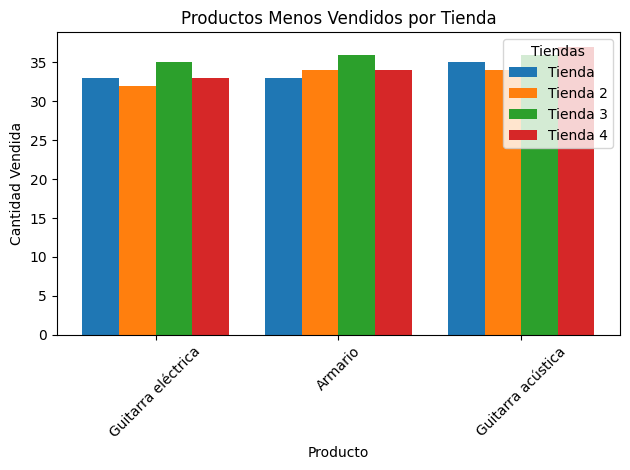

In [394]:
def graficar_barras_menos_vendidos(tiendas_data):
    width = 0.2
    x = np.arange(len(tiendas_data[0]['Productos Menos Vendidos'].index))
    for i, tienda_data in enumerate(tiendas_data):
        productos_menos_vendidos = tienda_data['Productos Menos Vendidos']
        plt.bar(x + i * width, productos_menos_vendidos.values, width=width, label=tienda_data['Tienda'])

    plt.title('Productos Menos Vendidos por Tienda')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(x + width * (len(tiendas_data) - 1) / 2, productos_menos_vendidos.index, rotation=45)
    plt.legend(title='Tiendas')

    plt.tight_layout()
    plt.show()

graficar_barras_menos_vendidos(productos_data)

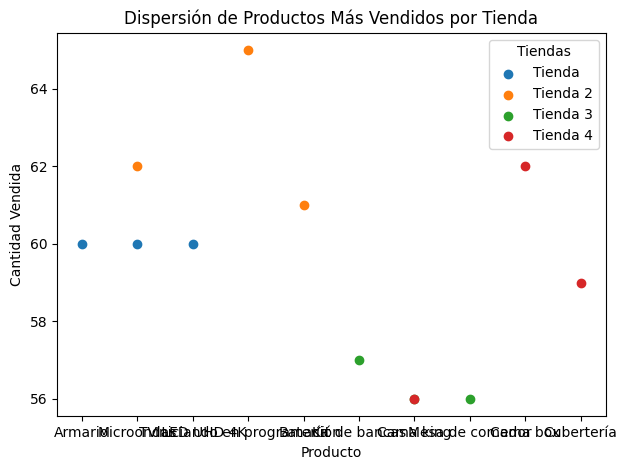

In [395]:
def graficar_dispersión_mas_vendidos(productos_data):
    for tienda_data in productos_data:
        productos_mas_vendidos = tienda_data['Productos Más Vendidos']
        plt.scatter(productos_mas_vendidos.index, productos_mas_vendidos.values, label=tienda_data['Tienda'])

    plt.title('Dispersión de Productos Más Vendidos por Tienda')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.legend(title='Tiendas')
    plt.tight_layout()
    plt.show()

graficar_dispersión_mas_vendidos(productos_data)

# 5. Envío promedio por tienda

In [396]:
tiendas = [tienda, tienda2, tienda3, tienda4]
def calcular_envio_promedio(tiendas):
    envio_data = []

    for i, tienda in enumerate(tiendas, start=1):
        envio_promedio = tienda['Costo de envío'].mean()

        nombre = 'Tienda' if i == 1 else f'Tienda {i}'
        envio_data.append({'Tienda': nombre, 'Envío Promedio': envio_promedio})

        print(f'El envío promedio de {nombre} es de {envio_promedio:,.0f}')
        print('--------------------------------------')

    return envio_data

envio_data = calcular_envio_promedio(tiendas)

El envío promedio de Tienda es de 26,019
--------------------------------------
El envío promedio de Tienda 2 es de 25,216
--------------------------------------
El envío promedio de Tienda 3 es de 24,806
--------------------------------------
El envío promedio de Tienda 4 es de 23,459
--------------------------------------


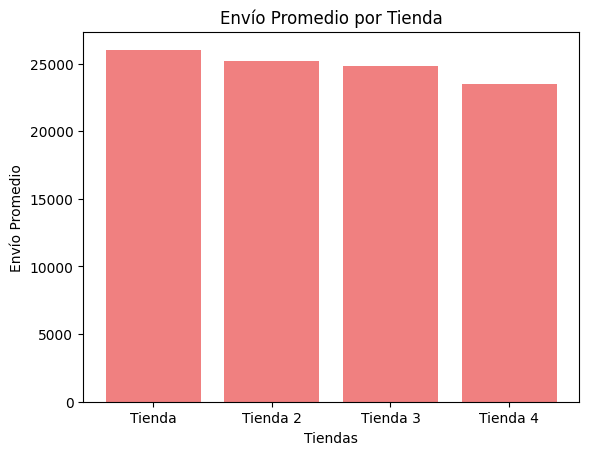

In [397]:
#Grafico de barras
def graficar_barras_envio(tiendas):

    tiendas_nombres = [d['Tienda'] for d in envio_data]
    envios_promedio = [d['Envío Promedio'] for d in envio_data]

    plt.bar(tiendas_nombres, envios_promedio, color='lightcoral')
    plt.title('Envío Promedio por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Envío Promedio')
    plt.show()

graficar_barras_envio(tiendas)

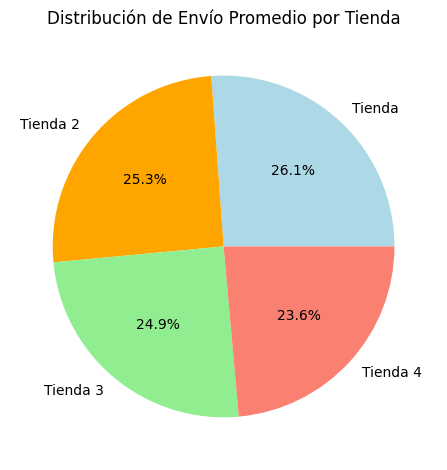

In [398]:
#Grafico de torta
def graficar_torta_envio(tiendas):
    tiendas_nombres = [d['Tienda'] for d in envio_data]
    envios_promedio = [d['Envío Promedio'] for d in envio_data]

    plt.pie(envios_promedio, labels=tiendas_nombres, autopct='%1.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'salmon'])
    plt.title('Distribución de Envío Promedio por Tienda')
    plt.tight_layout()
    plt.show()

graficar_torta_envio(tiendas)

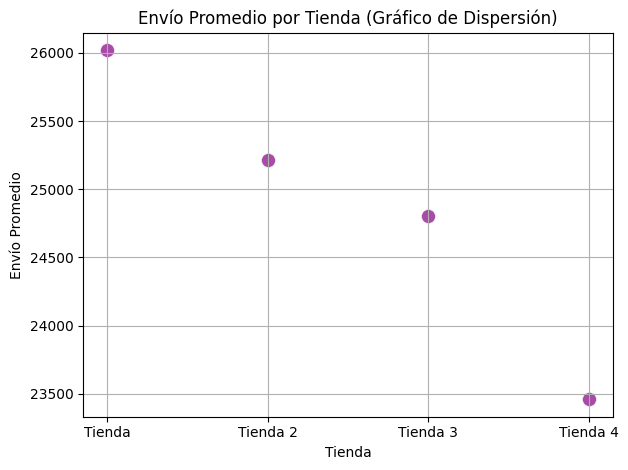

In [399]:
#Grafico de dispersion
def graficar_dispersión_envio(tiendas):
    tiendas_nombres = [d['Tienda'] for d in envio_data]
    envios_promedio = [d['Envío Promedio'] for d in envio_data]

    plt.scatter(tiendas_nombres, envios_promedio, color='purple', s=100, alpha=0.7, edgecolors='w', linewidth=0.5)
    plt.title('Envío Promedio por Tienda (Gráfico de Dispersión)')
    plt.xlabel('Tienda')
    plt.ylabel('Envío Promedio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

graficar_dispersión_envio(tiendas)

# **Informe**

1.Facturación Total

Ventas en cada tienda:
*   Tienda : 1,150,880,400
*   Tienda 2: 1,116,343,500
*   Tienda 3: 1,098,019,600
*   Tienda 4: 1,038,375,700

Análisis: Tienda tiene la mayor facturación, seguida por Tienda2, Tienda3 , Tienda4. Esto indica que Tienda es la que mejor vende.

2.Ventas por categoría

Las categorías más populares de las tiendas son las siguientes: Muebles, Electrónicos y Juguetes, no hay mucha diferencia en las categorías todas tienen casi las mismas.

3.Producto más y menos vendidos

*  Tienda : Los más vendidos son Armario, Microondas y TV LED UHD 4K (60 unidades cada uno). Los menos vendidos son Auriculares con micrófono, Celular ABXY y Olla de presión.

*  Tienda 2: Los más vendidos son Iniciando en programación, Microondas y Batería. Los menos vendidos son Juego de mesa, Impresora y Mesa de comedor.

* Tienda 3: Los más vendidos son Kit de bancas, Cama king y Mesa de comedor. Los menos vendidos son Bloques de construcción, Microondas y Mochila.

* Tienda 4: Los más vendidos son Cama box, Cubertería y Cama king. Los menos vendidos son Guitarra eléctrica, Armario y Guitarra acústica.

4.Calificación promedio

*   Tienda : 3.98
*   Tienda 2: 4.04
*   Tienda 3: 4.05
*   Tienda 4: 3.99

Análisis: Las calificaciones son muy similares, las diferencias son pequeñas pero la mas alta es de la tienda 3.

5.Envío promedio

*   Tienda : 26,019
*   Tienda 2: 25,216
*   Tienda 3: 24,806
*   Tienda 4: 23,459

Análisis: La tienda 4 tiene el costo de envío mas bajo, lo que puede ser un punto en contra y a favor, ya que, puede ser benificioso para la gente y no para la empresa.

## Conclusión final
La tienda 4 parace ser la opción menos eficiente para seguir en funcionamiento y es la que debe vender, porque es la que tiene el menor volumen de ventas, unas de las calificaciones mas bajas, el coste de envio es el mas bajo pero aun asi no logra ser la mejor en facturación. Entonces las otras tienen un mejor rendimiento dejando a la tienda 4 como la mejor elección para vender.







